<a href="https://colab.research.google.com/github/isabelapt/Bootcamp_Data_Science_Alura/blob/main/Bootcamp_Data_Science_Alura_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISANDO DADOS DA SAÚDE COM PYTHON E PANDAS**

Importando todas as bibliotecas necessárias

In [603]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Aula 1 : Aquisição e leitura de dados reais

In [604]:
URL = 'https://raw.githubusercontent.com/isabelapt/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'
dados = pd.read_csv(URL, encoding="ISO-8859-1",skiprows = 3, skipfooter=12, sep=";",                     
                    thousands=".", decimal=",", engine='python')
dados.head() 

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [605]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [606]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [607]:
# Muda a formato que os dados são mostrados
pd.options.display.float_format = "{:.2f}".format 
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [608]:
# Média dos dados de uma coluna específica
dados["2008/Jan"].mean()

15126846.638148146

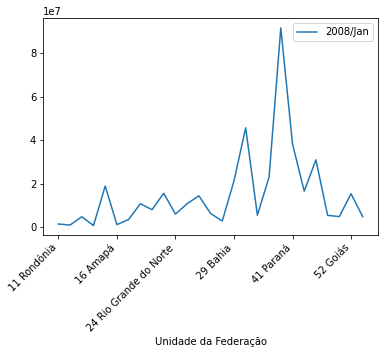

In [609]:
ax = dados.plot(x ="Unidade da Federação" ,y = "2008/Jan")

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right') 
plt.show()

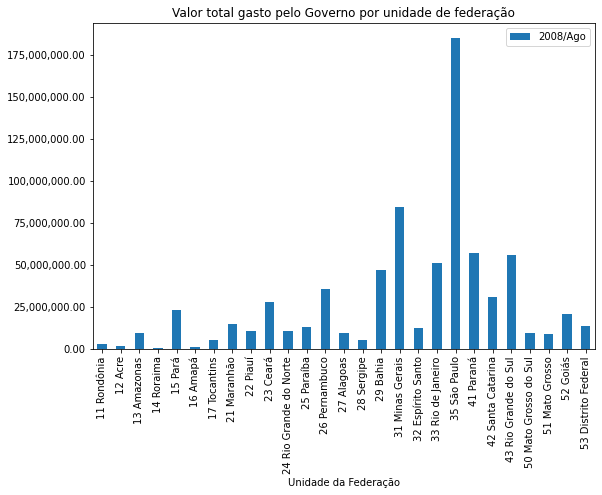

In [610]:
ax = dados.plot(x ="Unidade da Federação" ,y = "2008/Ago", kind = "bar", figsize=(9,6))

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Título do plot
plt.title("Valor total gasto pelo Governo por unidade de federação")
plt.show()

## **DESAFIO 1 : Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.**

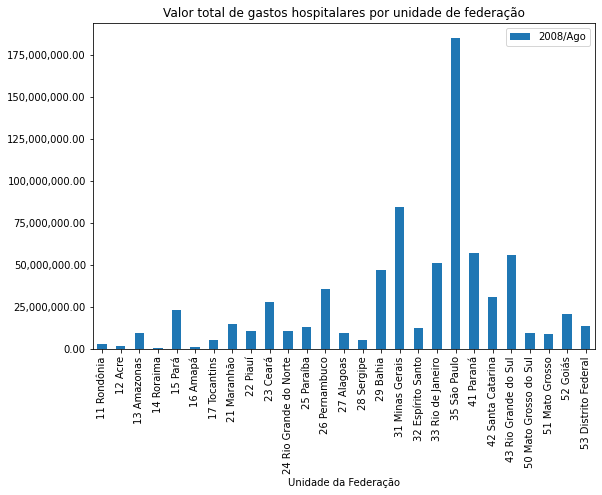

In [611]:
ax = dados.plot(x ="Unidade da Federação",
                y = "2008/Ago",
                kind = "bar",
                figsize=(9,6))

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Título mais descritivo
plt.title("Valor total de gastos hospitalares por unidade de federação")
plt.show()

## **Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.**



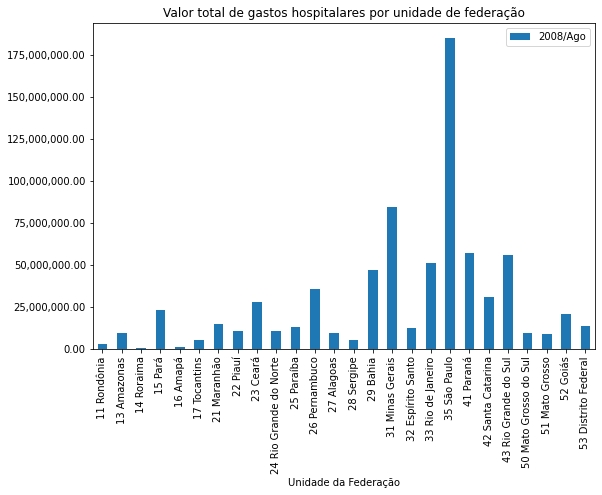

In [612]:
# Remove/Filtra as linhas em que possuem '-' na coluna "2020/Ago"
# Using "inplace", we can alter the original data in a single line
dados.drop(dados[dados["2020/Ago"] == '-'].index, inplace = True)

# Converter o restante dos dados para float
dados["2020/Ago"] = dados["2020/Ago"].astype(float)

ax = dados.plot(x ="Unidade da Federação",
                y = "2008/Ago",
                kind = "bar",
                figsize=(9,6))

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Título mais descritivo
plt.title("Valor total de gastos hospitalares por unidade de federação")
plt.show()

# Aula 2 : Primeiras visualizações dos dados

In [613]:
URL = "https://raw.githubusercontent.com/isabelapt/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"
dados = pd.read_csv(URL, encoding="ISO-8859-1", skiprows = 3, skipfooter=12, sep=";",                     
                    thousands=".", decimal=",", engine='python')

In [614]:
# To select multiple columms --> Use double []
dados[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [615]:
# A média retorna somente os valores para as colunas que tem todas as linhas preenchidas
# Index é imutável
# Para inserir mais uma coluna em colunas preenchidas tem que transformar para lista : .tolist()
colunas_preenchidas = dados.mean().index.tolist()

# Inserir, na posição 0, ou seja, no começo do dataset (para facilitar),
# o valor “Unidade da Federação”.
colunas_preenchidas.insert(0,"Unidade da Federação")

# Fazer slice no dataFrame usando só as colunas_preenchidas
dados_usaveis = dados[colunas_preenchidas]
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [616]:
# Mudar o index para ser a coluna "Unidade da Federação"
# O set_index retorna um valor novo que tem que ser reatribuido
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis.head() 

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [617]:
dados_usaveis["2019/Ago"].head() # Retorna a coluna mencionada "2019/Ago"

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [618]:
dados_usaveis.loc["12 Acre"] # Retorna a linha, cujo o indice é "12 Acre"

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

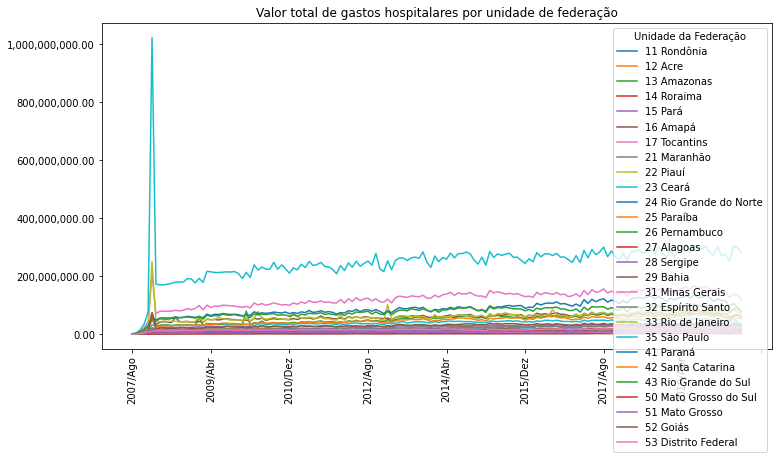

In [619]:
dados_usaveis = dados_usaveis.drop("Total", axis=1) # axis = 0 é o eixo das linhas / axis = 1 é o eixo das colunas
ax = dados_usaveis.T.plot(figsize=(12,6)) # .T --> Troca as posição linhas pela posição das colunas

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Título mais descritivo
plt.title("Valor total de gastos hospitalares por unidade de federação")
plt.show()

## DESAFIO 1: Reposicionar a legenda do gráfico em uma posição mais adequada 

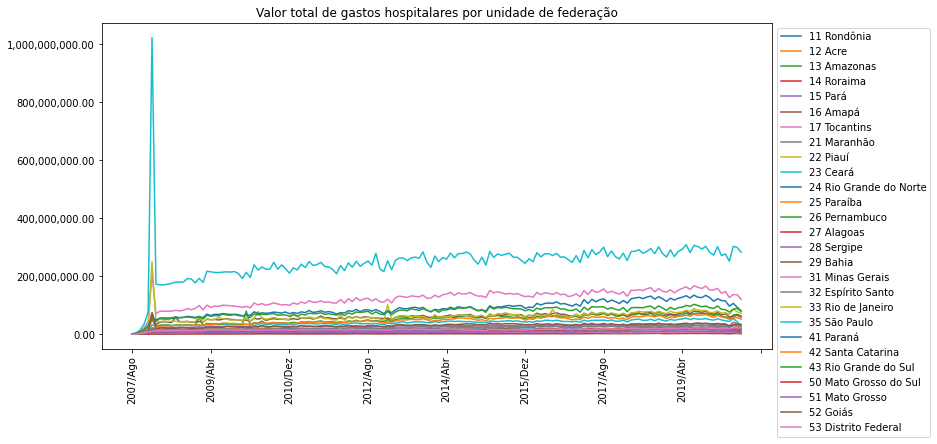

In [620]:
import matplotlib.pyplot as plt

# Troca as posição linhas pela posição das colunas
ax = dados_usaveis.T.plot(figsize=(12,6)) 
ax.legend(bbox_to_anchor = (1,1), loc = "upper left") # ax.legend(loc=(1.02,0))

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Título mais descritivo
plt.title("Valor total de gastos hospitalares por unidade de federação")
plt.show()

## DESAFIO 2: Plotar o gráfico de linha com apenas 5 estados de sua preferência

In [621]:
dados_usaveis.index # ou dados_usaveis.T.columns

# Seleciona os cinco primeiros indices
dados_usaveis.index[:5] # ou dados_usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

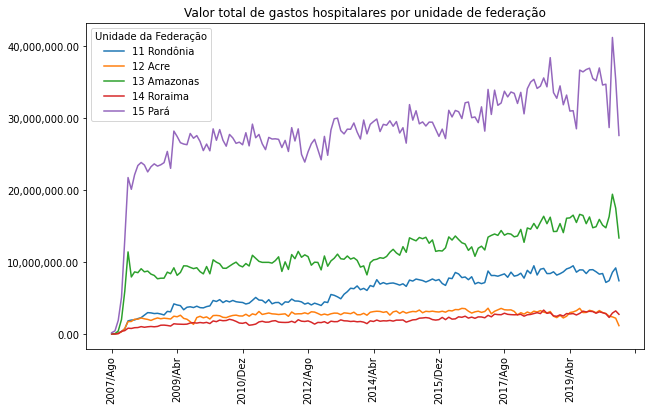

In [622]:
# dados_usaveis[:5] --> Seleciona as 5 primeiras linhas que no caso são os estados
# Em construções do tipo usaveis.index[:5],o primeiro valor, quando é 0, é opcional
ax = dados_usaveis[:5].T.plot(figsize=(10,6)) # ou dados_usaveis.loc[dados_usaveis.index[:5]].T.plot(figsize=(10,6))

# Rotaciona os ticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Título mais descritivo
plt.title("Valor total de gastos hospitalares por unidade de federação")
plt.show()

# Aula 3: Manipulação de dados

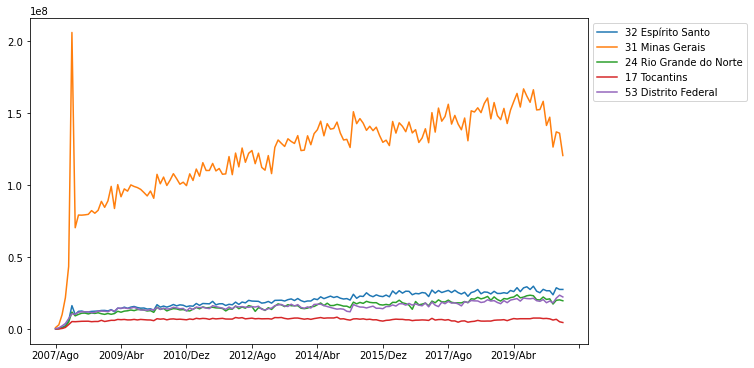

In [623]:
# Selecionar 5 Estados de forma aleatória

import numpy as np
np.random.seed(687942)

estados_selecionados = dados_usaveis.sample(n=5)
ax = estados_selecionados.T.plot(figsize=(10,6))
ax.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.show()

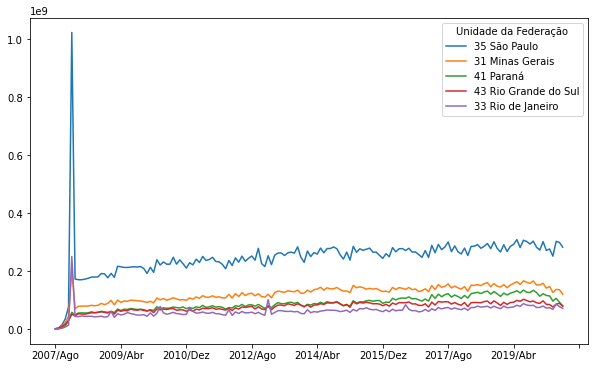

In [624]:
# Somar os gastos de cada Unidade da Federação e criar uma coluna "Total"
dados_usaveis["Total"] = dados_usaveis.sum(axis = 1)

# Ordernar os dados, pelo total de forma descendente
ordenado_por_total = dados_usaveis.sort_values("Total", ascending = False)

# Drop/Remove a coluna Total
ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)

# Plot dos 5 Estados que mais gastaram
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.show()

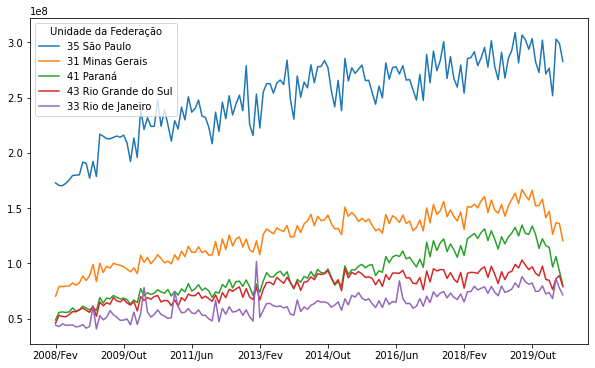

In [625]:
# Existe um pico em que dificulta a visualização dos dados
# Fazer um slice no DataFrame para plotar os dados sem o pico
# Seleciona da setima em diante, joga fora as seis primeiras
ordenado_por_total = ordenado_por_total[ordenado_por_total.columns[6:]] 

# Plot dos 5 Estados que mais gastaram
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.show()

## DESAFIO 1: Escolher uma palete de cores mais adequada do matplotlib.

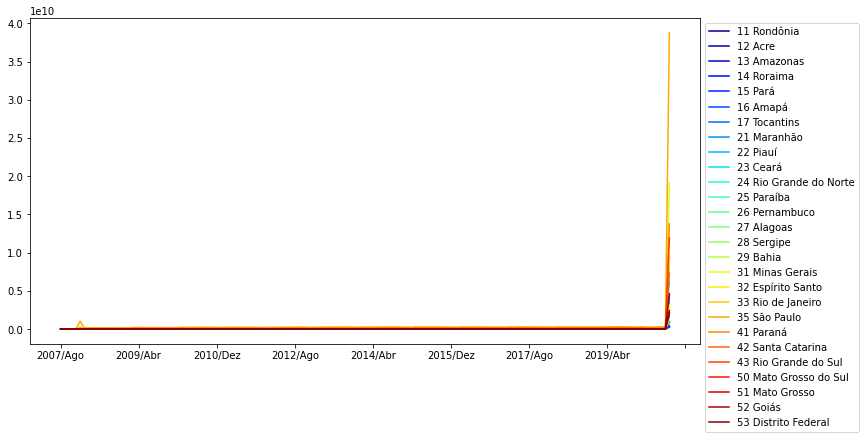

In [626]:
import matplotlib.pyplot as plt

ax = dados_usaveis.T.plot(colormap='jet' ,figsize=(12,6)) 
ax.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.show()

##DESAFIO 2: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [627]:
lista_dados_usaveis = dados_usaveis.index.tolist()
regiao = []
for i in lista_dados_usaveis:
  if i[0] == '1':
    regiao.append("Norte") 
  elif i[0] == '2':
    regiao.append("Nordeste")
  elif i[0] == '3':
    regiao.append("Sudeste") 
  elif i[0] == '4':
    regiao.append("Sul")
  else:
    regiao.append("Centro-Oeste")

dados_usaveis["Região"] = regiao

## DESAFIO 3: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

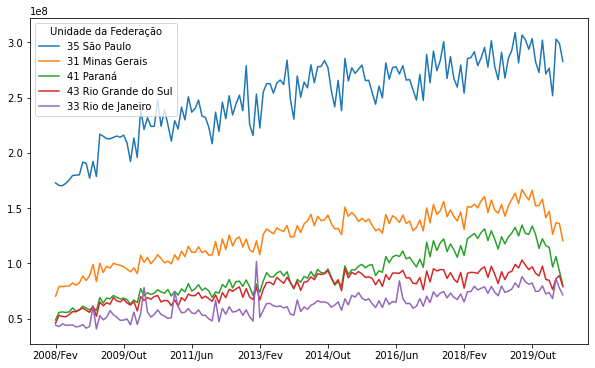

In [628]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))

## DESAFIO 4: Adicione o seu estado aos 5 estados plotados anteriormente

## DESAFIO 5: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

## DESAFIO 6: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

## DESAFIO 7: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

# Aula 4: Análise de gráficos e criação da hipótese

## DESAFIO 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

## DESAFIO 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

# Aula 5: Manipulação e interpretação de gráficos

## DESAFIO 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.



## DESAFIO 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

## DESAFIO 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

## Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

## DESAFIO 5: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

## SUPER DESAFIO: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.